In [13]:
import tensorflow as tf
import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio
from IPython import display
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [10]:
encoding_dim = 32
input_img = keras.layers.Input(shape=(784,))
encoded = keras.layers.Dense(encoding_dim,activation='relu')(input_img)
decoded = keras.layers.Dense(784,activation='sigmoid')(encoded)
autoencoder = keras.models.Model(input_img,decoded)

In [12]:
encoder = keras.models.Model(input_img,encoded)
encoded_input = keras.layers.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [16]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 35s 3us/step


In [17]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [18]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [22]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [26]:
autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 20s 330us/step - loss: 0.3702 - val_loss: 0.2723
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2656 - val_loss: 0.2557
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2451 - val_loss: 0.2319
Epoch 4/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2232 - val_loss: 0.2127
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2075 - val_loss: 0.1998
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1965 - val_loss: 0.1905
Epoch 7/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1883 - val_loss: 0.1833
Epoch 8/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1818 - val_loss: 0.1774
Epoch 9/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1764 - val_loss: 0.1724
Epo

In [27]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

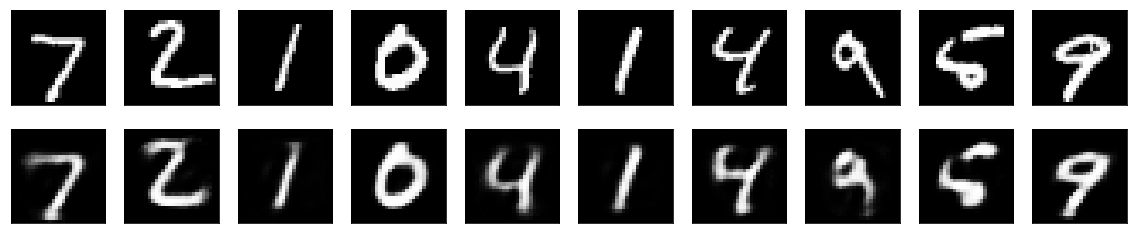

In [37]:
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()